Create a non-normally distributed dataset by combining two generated normal distributions to form a bimodel distribution and then calculate and plot the Empirical Cumulative Distribution Function (ECDF)

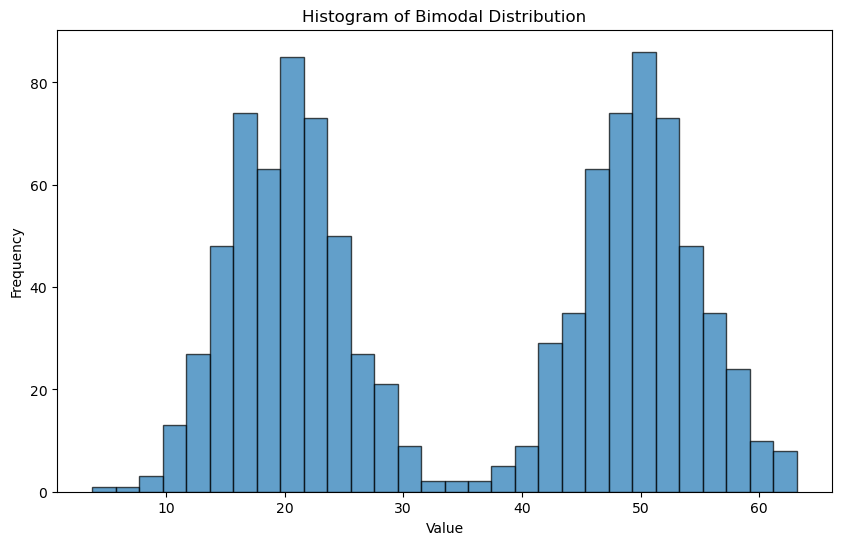

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Seed 
np.random.seed(42)

# Generate two normal distributions
data1 = np.random.normal(loc=20, scale=5, size=500)
data2 = np.random.normal(loc=50, scale=5, size=500)

# Combine the two distributions to form a bimodal distribution
con_data = np.concatenate((data1, data2))

# Plot the histogram to visualize the bimodal distribution
plt.figure(figsize=(10, 6))
plt.hist(con_data, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Bimodal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

 


Analyzing the generated data.

In [3]:
from tabulate import tabulate

def range(x, axis=0):
    return np.max(x, axis=axis) - np.min(x, axis=axis)

data = [
["Mean: ", np.mean(con_data)],
["Max value", np.max(con_data)],
["Min value", np.min(con_data)],
["Range:", range(con_data)]]

print (tabulate(data))

---------  --------
Mean:      35.0967
Max value  63.1619
Min value   3.79366
Range:     59.3682
---------  --------


Results: 

- Max value : 63.16%

- Min value : 3.79%

- Mean : 35

Using ECDF  to find the probability of given values.

In [4]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF 

ecdf = ECDF(con_data)

data = [
["P(x<63.13): ", ecdf(63.13)],
["P(x<3.79): ", ecdf(3.79)],
["P(x<Mean):", ecdf(np.mean(con_data))]]

print (tabulate(data))

-----------  -----
P(x<63.13):  0.999
P(x<3.79):   0
P(x<Mean):   0.498
-----------  -----


notice that there is an above average probability of choosing a value below the average 63.13%.

statistically calculating what you'd expect a random varaible to be can often be vastly different than what you would discover using probability.

looking at the probability of a choosen value falling in a certain range

In [5]:
data = [
["P(x>60): ", 1 - ecdf(60)],
["P(x>5): ", 1 - ecdf(5)],
["P(x<50):", ecdf(30)]]

print (tabulate(data))

--------  -----
P(x>60):  0.011
P(x>5):   0.999
P(x<50):  0.487
--------  -----


Condition      Probability
-----------  -------------
P(x > 60):           0.011
P(x > 5):            0.999
P(x < 30):           0.487


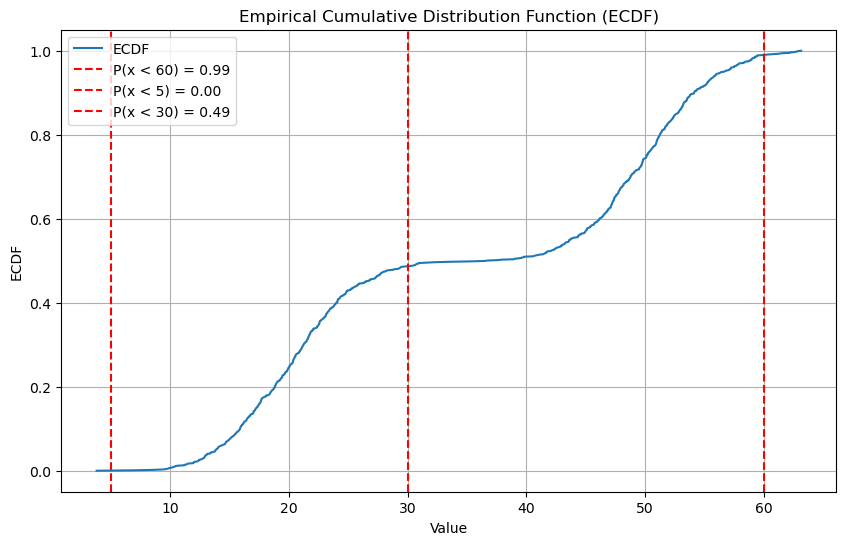

In [7]:
# Print the probabilities using tabulate
print(tabulate(prob_data, headers=["Condition", "Probability"]))

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.plot(ecdf.x, ecdf.y, label='ECDF')

# Add vertical lines at specific x-values (e.g., 60, 5, 30)
x_values = [60, 5, 30]
for x in x_values:
    plt.axvline(x=x, color='r', linestyle='--', label=f'P(x < {x}) = {ecdf(x):.2f}')

plt.legend()
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.grid(True)
plt.show()
